# Q1) PCA for Breast Cancer Diagnosis

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Loading data using sklearn's dataset
breast_cancer_data = load_breast_cancer()
X = breast_cancer_data['data']
y = breast_cancer_data['target']
feature_names = breast_cancer_data['feature_names']

breast_cancer_df = pd.DataFrame(X, columns=feature_names)
breast_cancer_df['target'] = y

print(f"No. of samples: {X.shape[0]}")
print(f"No. of features: {X.shape[1]}")
print(f"Class distribution: Malignant={np.sum(y==0)}, Benign={np.sum(y==1)}")
breast_cancer_df.head()

No. of samples: 569
No. of features: 30
Class distribution: Malignant=212, Benign=357


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# a) Standardize & Covariance:

In [3]:
# Standardize all 30 features to zero mean and unit variance
scaler = StandardScaler(with_mean=True, with_std=True)
X_standardized = scaler.fit_transform(X)

# Compute the 30×30 sample covariance matrix 
# rowvar=False -> tells each Column represents a feature.
S = np.cov(X_standardized, rowvar=False)

# Frobenius norm ||S||_F = sqrt(sum_{i,j} S_{ij}^2)
frobenius_norm_S = np.linalg.norm(S, ord='fro')

print(f"Frobenius norm of the covariance matrix S: {frobenius_norm_S:.6f}")

Frobenius norm of the covariance matrix S: 15.062351


# b) Top-k Eigenpairs:

In [4]:
# set n_components=2 to find the top-2 principal components
pca_model = PCA(n_components=2, svd_solver='full', random_state=0)

# Fit PCA on the standardized data
X_projected = pca_model.fit_transform(X_standardized)

# pca.explained_variance_ stores the eigenvalues (lambda)
eigenvalue_pc1, eigenvalue_pc2 = pca_model.explained_variance_

# pca.explained_variance_ratio_ stores the percentage of variance explained by each component.
explained_variance_ratio_percent = pca_model.explained_variance_ratio_ * 100.0

# Cumulative explained variance
cumulative = np.cumsum(explained_variance_ratio_percent)

print("(i) Eigenvalues (λ1, λ2):")
print(f"    λ1 = {eigenvalue_pc1:.6f}")
print(f"    λ2 = {eigenvalue_pc2:.6f}")


print("\n(ii) Explained Variance Ratio (%):")
print(f"    PC1 = {explained_variance_ratio_percent[0]:.6f}%")
print(f"    PC2 = {explained_variance_ratio_percent[1]:.6f}%")

print("\n(iii) Cumulative Explained Variance (%):")
print(f"    PC1 + PC2 = {cumulative[1]:.6f}%")

(i) Eigenvalues (λ1, λ2):
    λ1 = 13.304991
    λ2 = 5.701375

(ii) Explained Variance Ratio (%):
    PC1 = 44.272026%
    PC2 = 18.971182%

(iii) Cumulative Explained Variance (%):
    PC1 + PC2 = 63.243208%


# c) 2D Projection:

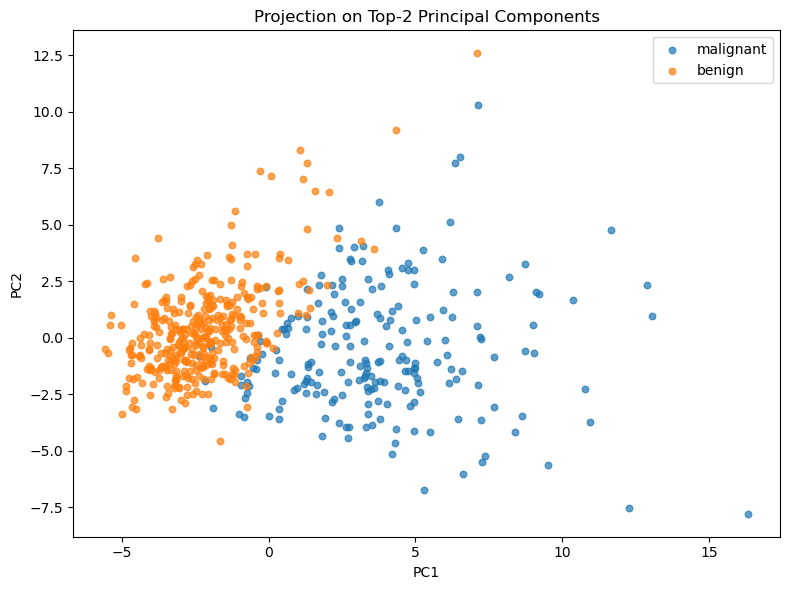

Class Means:-
 - Malignant: (PC1 = 3.714777, PC2 = -0.583135)
 - Benign   : (PC1 = -2.205974, PC2 = 0.346287)


In [5]:
pc_dataframe = pd.DataFrame(X_projected, columns=["PC1", "PC2"])
pc_dataframe["target"] = y
target_label_map = {0: "malignant", 1: "benign"}
class_means = pc_dataframe.groupby("target")[["PC1", "PC2"]].mean().rename(index=target_label_map)

plt.figure(figsize=(8, 6))

mask_malignant = (y == 0)
mask_benign = (y == 1)

plt.scatter(X_projected[mask_malignant, 0],
            X_projected[mask_malignant, 1],
            alpha=0.7, s=22, label="malignant")

plt.scatter(X_projected[mask_benign, 0],
            X_projected[mask_benign, 1],
            alpha=0.7, s=22, label="benign")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection on Top-2 Principal Components")
plt.legend()
plt.tight_layout()
plt.show()

print("Class Means:-")
print(f" - Malignant: (PC1 = {class_means.loc['malignant','PC1']:.6f}, "
      f"PC2 = {class_means.loc['malignant','PC2']:.6f})")
print(f" - Benign   : (PC1 = {class_means.loc['benign','PC1']:.6f}, "
      f"PC2 = {class_means.loc['benign','PC2']:.6f})")

# d) Reconstruction Error:

In [6]:
# Reconstruct the data back to 30D from the 2D PCs
X_reconstructed = pca_model.inverse_transform(X_projected)

# Average MSE per sample in standardized space
per_sample_mse = np.mean((X_standardized - X_reconstructed) ** 2, axis=1)
average_reconstruction_mse = per_sample_mse.mean()

print("Reconstruction Error (from 2D → 30D):")
print(f"Average per-sample MSE: {average_reconstruction_mse:.6f}")

Reconstruction Error (from 2D → 30D):
Average per-sample MSE: 0.367568


# Q2) PCA with Missing Values (Synthetic Spectroscopy) 

# a) Imputation:

In [7]:
from pathlib import Path

q2_file_path = Path("/Users/jk/Downloads/BITS Pilani/Python Codes/synthetic_pca_dataset.xlsx")

if not q2_file_path.exists():
    raise FileNotFoundError(f"Could not find file at: {q2_file_path}")

q2_df = pd.read_excel(q2_file_path)[["X1","X2","X3","X4","X5"]].copy()

missing_before = q2_df["X5"].isna().sum()
mean_x5 = q2_df["X5"].mean(skipna=True)
q2_df["X5"] = q2_df["X5"].fillna(mean_x5)

print(f"Missing values in X5 before imputation: {missing_before}")
print(f"Imputed using mean value: {mean_x5:.6f}")


Missing values in X5 before imputation: 34
Imputed using mean value: -0.059253


# b) Two PCAs:

In [8]:
q2_X_raw = q2_df.to_numpy()
q2_scaler = StandardScaler(with_mean=True, with_std=True)
q2_X_standardized = q2_scaler.fit_transform(q2_X_raw)  # (400,5)

# Covariance PCA on unstandardized data
q2_pca_cov = PCA(n_components=5, svd_solver="full", random_state=0).fit(q2_X_raw)

# Correlation PCA on standardized data
q2_pca_corr = PCA(n_components=5, svd_solver="full", random_state=0).fit(q2_X_standardized)

print("PCA models for (i) Covariance and (ii) Correlation have been fitted.")


PCA models for (i) Covariance and (ii) Correlation have been fitted.


# c) Spectrum:

In [9]:
# Eigen Values and explained variance ratios
print("---- Covariance PCA ----")
for i in range(5):
    print(f"PC{i+1}: Eigenvalue (λ{i+1}) = {q2_pca_cov.explained_variance_[i]:.6f}, "
          f"Explained Var = {q2_pca_cov.explained_variance_ratio_[i]*100:.6f}%")
print(f"Cumulative = {q2_pca_cov.explained_variance_ratio_.sum()*100:.6f}%\n")

print("---- Correlation PCA ----")
for i in range(5):
    print(f"PC{i+1}: Eigenvalue (λ{i+1}) = {q2_pca_corr.explained_variance_[i]:.6f}, "
          f"Explained Var = {q2_pca_corr.explained_variance_ratio_[i]*100:.6f}%")
print(f"Cumulative = {q2_pca_corr.explained_variance_ratio_.sum()*100:.6f}%")


---- Covariance PCA ----
PC1: Eigenvalue (λ1) = 10222.076818, Explained Var = 97.721121%
PC2: Eigenvalue (λ2) = 130.401106, Explained Var = 1.246610%
PC3: Eigenvalue (λ3) = 106.931128, Explained Var = 1.022241%
PC4: Eigenvalue (λ4) = 0.832943, Explained Var = 0.007963%
PC5: Eigenvalue (λ5) = 0.216020, Explained Var = 0.002065%
Cumulative = 100.000000%

---- Correlation PCA ----
PC1: Eigenvalue (λ1) = 2.007119, Explained Var = 40.042030%
PC2: Eigenvalue (λ2) = 1.075447, Explained Var = 21.455171%
PC3: Eigenvalue (λ3) = 0.988246, Explained Var = 19.715514%
PC4: Eigenvalue (λ4) = 0.937684, Explained Var = 18.706788%
PC5: Eigenvalue (λ5) = 0.004035, Explained Var = 0.080497%
Cumulative = 100.000000%


# d) PC Scatter:

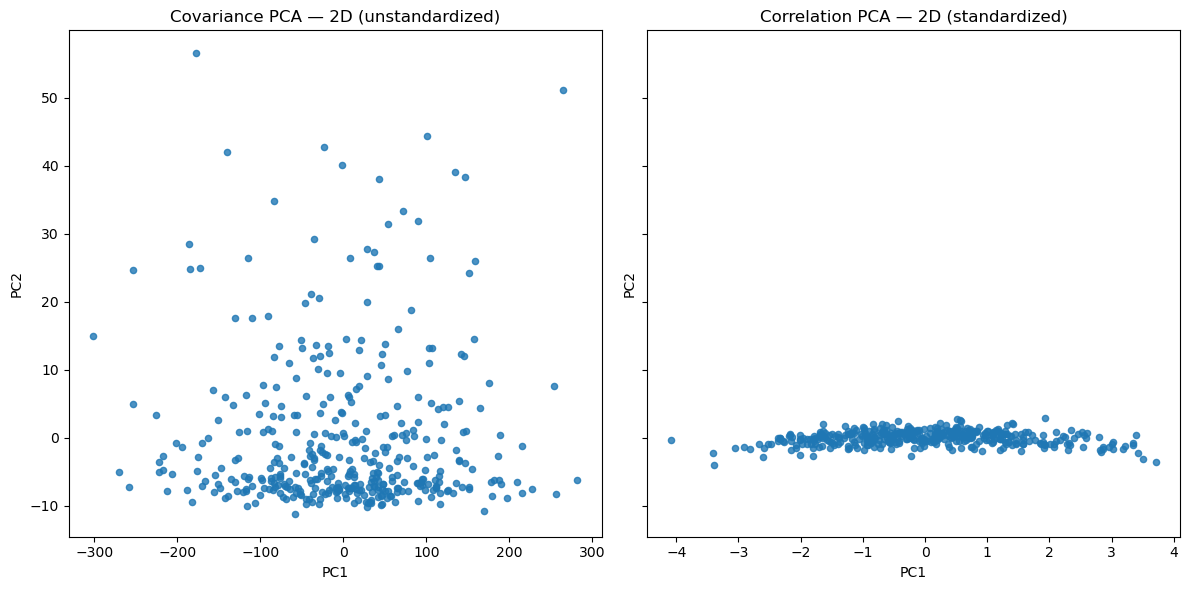

In [10]:
# 2D projection (first two PCs)
q2_pca_cov_2 = PCA(n_components=2, svd_solver="full", random_state=0).fit(q2_X_raw)
q2_Z_cov = q2_pca_cov_2.transform(q2_X_raw)

q2_pca_corr_2 = PCA(n_components=2, svd_solver="full", random_state=0).fit(q2_X_standardized)
q2_Z_corr = q2_pca_corr_2.transform(q2_X_standardized)

# Scatter plots
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax[0].scatter(q2_Z_cov[:,0], q2_Z_cov[:,1], s=20, alpha=0.8)
ax[0].set_title("Covariance PCA — 2D (unstandardized)")
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")

ax[1].scatter(q2_Z_corr[:,0], q2_Z_corr[:,1], s=20, alpha=0.8)
ax[1].set_title("Correlation PCA — 2D (standardized)")
ax[1].set_xlabel("PC1")
ax[1].set_ylabel("PC2")

fig.tight_layout()
plt.show()

# Brief Comment on Structure:
**Covariance PCA (Top)**: The plot is "squashed." The data is stretched almost perfectly along the PC1 axis, which captures **97.7%** of the variance. The variance along the PC2 axis **(1.25%)** is so small in comparison that the 2D structure is not visible. This plot is not very useful for finding patterns.

**Correlation PCA (Bottom)**: This plot is much more informative. By standardizing the features, we prevent any single feature from dominating. The plot shows a clear 2D elliptical cluster, revealing the underlying correlation structure of the data. This is the structure generated by the two latent factors mentioned in the problem context.

# e) Reconstruction (2 PCs):

In [11]:
# We compute reconstruction error in both spaces because Covariance PCA and Correlation PCA operate on data with different scales.
# - In native space, each PCA’s MSE reflects reconstruction quality in its own units.
# - In original units, we rescale standardized data back to real-world magnitudes so both methods can be compared fairly.

# A) MSE in each model's *native space*
# Covariance PCA works directly on unstandardized data
q2_X_cov_recon_native = q2_pca_cov_2.inverse_transform(q2_Z_cov)
# Correlation PCA works on standardized data
q2_X_corr_recon_std_native = q2_pca_corr_2.inverse_transform(q2_Z_corr)

q2_mse_cov_native = np.mean((q2_X_raw - q2_X_cov_recon_native) ** 2)
q2_mse_corr_native = np.mean((q2_X_standardized - q2_X_corr_recon_std_native) ** 2)

# (B) MSE in *original feature units* (after unscaling)\
# Correlation PCA — unscale back to original units
q2_X_corr_recon_original = q2_scaler.inverse_transform(q2_X_corr_recon_std_native)
q2_mse_corr_original = np.mean((q2_X_raw - q2_X_corr_recon_original) ** 2)

print("---- MSE In PCA Native Space ----")
print(f"Covariance PCA (raw units):          {q2_mse_cov_native:.6f}")
print(f"Correlation PCA (standardized units): {q2_mse_corr_native:.6f}\n")

print("---- MSE In Original Feature Units ----")
print(f"Covariance PCA (raw → raw):          {q2_mse_cov_native:.6f}")
print(f"Correlation PCA (std → unscaled):    {q2_mse_corr_original:.6f}")


---- MSE In PCA Native Space ----
Covariance PCA (raw units):          21.542028
Correlation PCA (standardized units): 0.385028

---- MSE In Original Feature Units ----
Covariance PCA (raw → raw):          21.542028
Correlation PCA (std → unscaled):    1227.964292


# f) Project New Data:

In [12]:
# new sample: use mean of each feature
q2_x_new = q2_df.mean(axis=0).values.reshape(1, -1)
print("\n---- New sample (mean of each column) ----")
print(pd.DataFrame(q2_x_new, columns=q2_df.columns))

# PCA trained on raw data can directly transform the raw sample.
q2_z_new_cov = q2_pca_cov_2.transform(q2_x_new)

# For standardized PCA, the new sample must be scaled using the same StandardScaler 
# used to fit the training data.
q2_x_new_std = q2_scaler.transform(q2_x_new)
q2_z_new_corr = q2_pca_corr_2.transform(q2_x_new_std)

print("\n---- Covariance PCA ----")
print(f"Projected 2D coordinates: PC1 = {q2_z_new_cov[0,0]:.6f}, PC2 = {q2_z_new_cov[0,1]:.6f}")
print("\n---- Correlation PCA ----")
print(f"Projected 2D coordinates: PC1 = {q2_z_new_corr[0,0]:.6f}, PC2 = {q2_z_new_corr[0,1]:.6f}")



---- New sample (mean of each column) ----
         X1        X2         X3        X4        X5
0 -0.232415 -0.255782 -11.935886 -0.047631 -0.059253

---- Covariance PCA ----
Projected 2D coordinates: PC1 = 0.000000, PC2 = 0.000000

---- Correlation PCA ----
Projected 2D coordinates: PC1 = 0.000000, PC2 = -0.000000


# Q3) Quadratic Programming (QP):

# a) Quadratic Program using Gradient Descent:

Converged in 38 iterations
---- Optimal Solution ----
Optimal x = [-1.000000, -0.125000]
Optimal objective value: f(x) = -3.062500


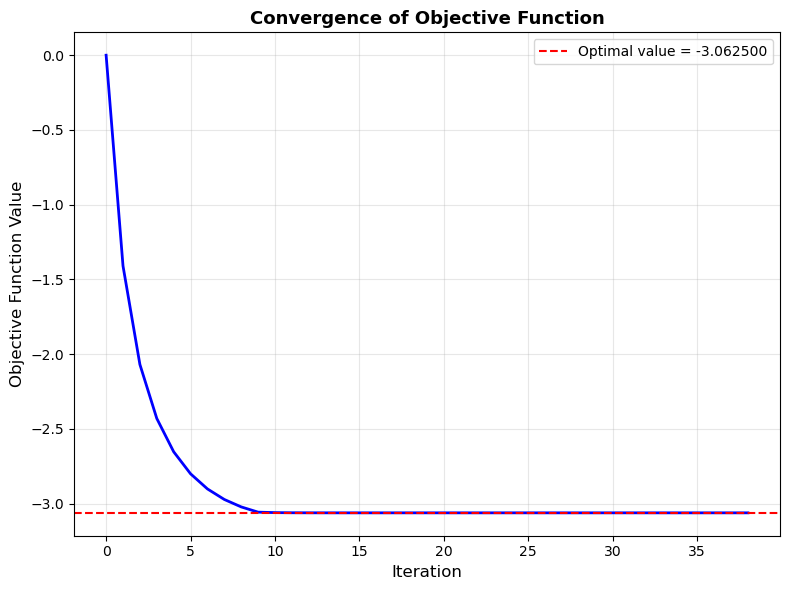

In [16]:

import numpy as np
import matplotlib.pyplot as plt

# Define the QP parameters
Q = np.array([[2.0, 1.0],
              [1.0, 4.0]])

c = np.array([5.0, 3.0])

A = np.array([[1.0,  0.0],
              [-1.0, 0.0],
              [0.0,  1.0],
              [0.0, -1.0]])

b = np.array([1.0, 1.0, 1.0, 1.0])

# Compute the objective function: f(x) = x^T Q x + c^T x
def objective_function(x):
    return  x.T @ Q @ x + c.T @ x

# Compute the gradient: ∇f(x) = 2 Q x + c
def gradient(x):
    return 2 * (Q @ x) + c

# Project x onto the box constraint [-1, 1] × [-1, 1]
def project_box(x, lower=-1.0, upper=1.0):
    return np.clip(x, lower, upper)

# Projected Gradient Descent for solving the constrained QP
def gradient_descent_qp(x0, learning_rate=0.01, max_iter=5000, tol=1e-8):
    
    x = x0.copy()
    history = {
        'x': [x.copy()],
        'objective': [objective_function(x)],
        'gradient_norm': [np.linalg.norm(gradient(x))]
    }
    
    for iteration in range(max_iter):
        # Compute gradient
        grad = gradient(x)
        
        # Gradient descent step
        x_new = x - learning_rate * grad
        
        # Project onto feasible region
        x_new = project_box(x_new)
        
        # Store history
        history['x'].append(x_new.copy())
        history['objective'].append(objective_function(x_new))
        history['gradient_norm'].append(np.linalg.norm(gradient(x_new)))
        
        # Check convergence
        if np.linalg.norm(x_new - x) < tol:
            print(f"Converged in {iteration + 1} iterations")
            break
        
        x = x_new
    
    return x, history

# Initial point (start from origin)
x0 = np.array([0.0, 0.0])

# Run gradient descent
x_optimal, history = gradient_descent_qp(x0, learning_rate=0.05, max_iter=5000)


print("---- Optimal Solution ----")
print(f"Optimal x = [{x_optimal[0]:.6f}, {x_optimal[1]:.6f}]")
print(f"Optimal objective value: f(x) = {objective_function(x_optimal):.6f}")

# Plot Convergence
fig, ax1 = plt.subplots(1, 1, figsize=(8,6)) 
iterations = range(len(history['objective']))
ax1.plot(iterations, history['objective'], 'b-', linewidth=2)
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('Objective Function Value', fontsize=12)
ax1.set_title('Convergence of Objective Function', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=objective_function(x_optimal), color='r', linestyle='--', 
            label=f'Optimal value = {objective_function(x_optimal):.6f}')
ax1.legend()
plt.tight_layout()
plt.show()

# b) Lagrangian Dual Problem:

In [14]:
# will add the image of the derivation here

# c) Dual Problem:

In [15]:
Qinv = np.linalg.inv(Q)

# Dual pieces
def dual_value(lmbda):
    # g(λ) = - b^T λ - 1/4 (c + A^T λ)^T Q^{-1} (c + A^T λ)
    d = c + A.T @ lmbda
    return - b @ lmbda - 0.25 * (d @ (Qinv @ d))

def dual_grad(lmbda):
    # ∇g(λ) = - b - 1/2 A Q^{-1} (c + A^T λ)
    d = c + A.T @ lmbda
    return - b - 0.5 * (A @ (Qinv @ d))

def proj_nonneg(z):
    # Projection onto λ >= 0 (componentwise)
    return np.maximum(z, 0.0)

def projected_gradient_ascent_dual(alpha=0.5, max_iter=1000, tol=1e-8):
    lam = np.zeros(A.shape[0])
    g_hist = [dual_value(lam)]
    for k in range(max_iter):
        grad = dual_grad(lam)
        lam_new = proj_nonneg(lam + alpha * grad)
        g_hist.append(dual_value(lam_new))
        if np.linalg.norm(lam_new - lam) < tol:
            print(f"(α={alpha}) Dual converged in {k+1} iterations.")
            lam = lam_new
            break
        lam = lam_new
    return lam, np.array(g_hist)

# Run dual ascent
lambda_star, g_hist = projected_gradient_ascent_dual(alpha=0.5, max_iter=2000, tol=1e-8)

# Recover primal from λ*
x_from_dual = -0.5 * (Qinv @ (c + A.T @ lambda_star))

# Primal objective (remember: no 1/2)
def f_obj(x):
    return x.T @ Q @ x + c.T @ x

f_at_x_from_dual = f_obj(x_from_dual)
g_at_lambda_star    = dual_value(lambda_star)

print("Optimal dual variable λ* (≥0):")
print(lambda_star)
print(f"\nDual optimum g(λ*): {g_at_lambda_star:.4f}")

print("\nPrimal point recovered from λ*:")
print(f"x* (from dual) = [{x_from_dual[0]:.6f}, {x_from_dual[1]:.6f}]")
print(f"f(x* from dual) = {f_at_x_from_dual:.6f}")


(α=0.5) Dual converged in 107 iterations.
Optimal dual variable λ* (≥0):
[0.         0.74999995 0.         0.        ]

Dual optimum g(λ*): -3.0625

Primal point recovered from λ*:
x* (from dual) = [-1.000000, -0.125000]
f(x* from dual) = -3.062500


# Observation:

For the given convex quadratic program, we obtained:-

**f(x\*)=−3.0625 and g(λ\*)=−3.0625**

Since the primal and dual optimal values are equal, the duality gap is zero.

Therefore, the problem satisfies **strong duality**.